#### random notebook that I got from chatgpt. I did additional modifications to it to make it work for me.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_theme(style='darkgrid', palette='Set2')

# set max pd columns 
pd.set_option('display.max_columns', None)

In [2]:
# import data
X_train = pd.read_csv('../project_data/X_train_encoded.csv', index_col=0)
X_val = pd.read_csv('../project_data/X_val_encoded.csv', index_col=0)
X_test = pd.read_csv('../project_data/X_test_encoded.csv', index_col=0)

y_train = pd.read_csv('../project_data/y_train.csv', index_col=0)  
y_val = pd.read_csv('../project_data/y_val.csv', index_col=0)

In [3]:
y_val

,Claim Injury Type
Claim Identifier,
5749872,2. NON-COMP
5454703,2. NON-COMP
6092487,3. MED ONLY
5508849,2. NON-COMP
6018090,2. NON-COMP
...,...
5627750,2. NON-COMP
5688230,2. NON-COMP
5656444,3. MED ONLY


In [4]:
display(X_train.head(1))
display(X_train.head(1))
display(X_test.head(1))

display(y_train.head(1))
display(y_val.head(1))

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,First Hearing Date_nabinary,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,0.0,4.0,0,0,1,0.203915,0.414305,0.136158,0.218027,0.018259,0.000781,0.008372,0.000184,0.260941,0.340657,0.115126,0.25967,0.011077,0.00109,0.01144,0.0,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.103556,0.398552,0.15358,0.317115,0.014393,0.001192,0.011568,0.000044,0.0,1.0,0.0,0.0,True,True,1.0,0.0,0.0,4.644391,6.665684,7.472609


,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,First Hearing Date_nabinary,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5506797,36.0,0.0,4.0,0,0,1,0.203915,0.414305,0.136158,0.218027,0.018259,0.000781,0.008372,0.000184,0.260941,0.340657,0.115126,0.25967,0.011077,0.00109,0.01144,0.0,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.103556,0.398552,0.15358,0.317115,0.014393,0.001192,0.011568,0.000044,0.0,1.0,0.0,0.0,True,True,1.0,0.0,0.0,4.644391,6.665684,7.472609


,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,C-3 Date_nabinary,First Hearing Date_nabinary,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6165911,19.0,0.0,1,0,0,0,0.091091,0.37106,0.133231,0.367597,0.022282,0.001308,0.013315,0.000115,0.10405,0.436156,0.128415,0.312378,0.008546,0.000455,0.009819,0.000182,0.120186,0.543563,0.125766,0.195438,0.008246,0.000039,0.006672,0.000091,0.080782,0.550535,0.120737,0.236993,0.006721,0.000373,0.003859,0.0,0.0,0.0,0.0,0.0,False,False,0.0,0.0,1.0,2.397895,2.397895,7.472609


,Claim Injury Type
Claim Identifier,
5506797,5. PPD SCH LOSS


,Claim Injury Type
Claim Identifier,
5749872,2. NON-COMP


In [5]:
y_train

,Claim Injury Type
Claim Identifier,
5506797,5. PPD SCH LOSS
5481216,2. NON-COMP
5520188,5. PPD SCH LOSS
5748412,3. MED ONLY
5653867,4. TEMPORARY
...,...
5930802,2. NON-COMP
5757476,2. NON-COMP
5988322,2. NON-COMP


In [6]:
# claim_injury_type_mapping = {
#     '4. TEMPORARY': 4,
#     '2. NON-COMP': 2,
#     '5. PPD SCH LOSS': 5,
#     '3. MED ONLY': 3,
#     '6. PPD NSL': 6,
#     '1. CANCELLED': 1,
#     '8. DEATH': 8,
#     '7. PTD': 7
# }

# y_train = y_train['Claim Injury Type'].map(claim_injury_type_mapping)
# y_val_encoded = y_val['Claim Injury Type'].map(claim_injury_type_mapping)


# encode target with label encoder
le = LabelEncoder()

y_train['Claim Injury Type'] = le.fit_transform(y_train['Claim Injury Type'])
y_val['Claim Injury Type'] = le.transform(y_val['Claim Injury Type'])

# save inverse to decode later
y_train_inverse = le.inverse_transform(y_train['Claim Injury Type'])
y_val_inverse = le.inverse_transform(y_val['Claim Injury Type'])

# can you create me a dicitonary of the inverse mapping of the label encoder?
# I want to use it to decode the predictions later

In [7]:
encoder_dict = dict(zip(y_train['Claim Injury Type'], le.inverse_transform(y_train['Claim Injury Type'])))

In [8]:
encoder_dict

{4: '5. PPD SCH LOSS',
 1: '2. NON-COMP',
 2: '3. MED ONLY',
 3: '4. TEMPORARY',
 0: '1. CANCELLED',
 7: '8. DEATH',
 5: '6. PPD NSL',
 6: '7. PTD'}

In [9]:
# check where columns contains negative values 
print(X_train.columns[(X_train < 0).any()])

# select all the columns that are not negative

Index([], dtype='object')


In [10]:
display(X_train.describe())  
display(X_val.describe())
display(X_test.describe())

display(X_train.shape)
display(X_val.shape)
display(X_test.shape)

display(y_train.shape)
display(y_val.shape)

display(X_train.info())
display(X_val.info())
display(X_test.info())

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log
count,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,3.960970e+05,3.960970e+05,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,3.960970e+05,396097.000000,396097.000000,396097.000000,3.960970e+05,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000,396097.000000
mean,42.542930,0.739263,3.005923,0.004532,0.047877,0.314375,0.084608,0.510595,0.120150,0.255599,0.020679,8.179815e-04,7.382030e-03,0.000169,0.084612,0.510583,0.120148,0.255609,0.020680,0.000817,0.007382,0.000169,8.461036e-02,0.510590,0.120158,0.255598,2.067629e-02,0.000815,0.007383,0.000169,0.084609,0.510589,0.120151,0.255603,0.020680,0.000818,0.007381,0.000169,0.092255,0.214735,0.001719,0.194556,0.237755,0.256273,0.255099,2.689384,2.759840,3.323198
std,13.627162,1.872018,2.001703,0.067165,0.213507,0.464267,0.056583,0.090170,0.013429,0.061121,0.008421,5.682248e-04,2.489585e-03,0.000120,0.061178,0.132020,0.028784,0.088785,0.069821,0.002165,0.005129,0.000333,5.563059e-02,0.147890,0.028943,0.107881,6.974232e-02,0.002692,0.004641,0.000788,0.071655,0.122555,0.028613,0.087244,0.069499,0.002678,0.007641,0.000337,0.289386,0.410639,0.041429,0.395859,0.425709,0.436575,0.435917,1.094644,1.182043,3.136764
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036661,0.363975,0.090895,0.153342,0.012469,3.412761e-14,3.079911e-13,0.000000,0.000404,0.195767,0.006956,0.010901,0.000000,0.000000,0.000000,0.000000,5.850198e-14,0.117043,0.006956,0.010901,2.105689e-09,0.000000,0.000000,0.000000,0.000000,0.337432,0.006956,0.010901,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147
25%,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.046007,0.414305,0.108995,0.216349,0.016443,4.917549e-04,5.339216e-03,0.000096,0

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log
count,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,1.722000e+05,1.722000e+05,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,1.722000e+05,172200.000000,172200.000000,172200.000000,1.722000e+05,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000,172200.000000
mean,42.576388,0.741951,3.003287,0.004582,0.049042,0.317404,0.084179,0.510915,0.120024,0.255850,0.020664,8.161352e-04,7.382956e-03,0.000168,0.084485,0.510437,0.119954,0.255364,0.021403,0.000832,0.007352,0.000173,8.466881e-02,0.510069,0.120008,0.255421,2.141810e-02,0.000850,0.007388,0.000176,0.084658,0.510862,0.119819,0.254954,0.021369,0.000822,0.007348,0.000169,0.092451,0.211614,0.001916,0.194948,0.236243,0.262921,0.251847,2.732918,2.768919,3.312236
std,13.622119,1.907856,2.000169,0.067535,0.215956,0.465468,0.056183,0.090141,0.013465,0.061200,0.008392,5.692792e-04,2.496354e-03,0.000120,0.061266,0.131392,0.029093,0.088869,0.071873,0.002563,0.005121,0.000413,5.627014e-02,0.146982,0.029317,0.107698,7.179605e-02,0.003094,0.004656,0.000980,0.072033,0.122842,0.028933,0.087875,0.071565,0.002700,0.007651,0.000338,0.289662,0.408454,0.043735,0.396162,0.424774,0.440221,0.434075,1.172001,1.182964,3.131575
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036661,0.363975,0.090895,0.153342,0.012469,3.412761e-14,3.079911e-13,0.000000,0.000404,0.195767,0.006956,0.010901,0.000000,0.000000,0.000000,0.000000,5.850198e-14,0.117043,0.006956,0.010901,2.105689e-09,0.000000,0.000000,0.000000,0.000000,0.337432,0.006956,0.010901,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147
25%,31.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.046007,0.414305,0.108995,0.216349,0.016443,4.917549e-04,5.339216e-03,0.000096,0

,Age at Injury,IME-4 Count,Number of Dependents,Alternative Dispute Resolution_binary,COVID-19 Indicator_binary,Attorney/Representative_binary,Industry Code_encoded_5. PPD SCH LOSS,Industry Code_encoded_2. NON-COMP,Industry Code_encoded_3. MED ONLY,Industry Code_encoded_4. TEMPORARY,Industry Code_encoded_1. CANCELLED,Industry Code_encoded_8. DEATH,Industry Code_encoded_6. PPD NSL,Industry Code_encoded_7. PTD,WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS,WCIO Cause of Injury Code_encoded_2. NON-COMP,WCIO Cause of Injury Code_encoded_3. MED ONLY,WCIO Cause of Injury Code_encoded_4. TEMPORARY,WCIO Cause of Injury Code_encoded_1. CANCELLED,WCIO Cause of Injury Code_encoded_8. DEATH,WCIO Cause of Injury Code_encoded_6. PPD NSL,WCIO Cause of Injury Code_encoded_7. PTD,WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS,WCIO Nature of Injury Code_encoded_2. NON-COMP,WCIO Nature of Injury Code_encoded_3. MED ONLY,WCIO Nature of Injury Code_encoded_4. TEMPORARY,WCIO Nature of Injury Code_encoded_1. CANCELLED,WCIO Nature of Injury Code_encoded_8. DEATH,WCIO Nature of Injury Code_encoded_6. PPD NSL,WCIO Nature of Injury Code_encoded_7. PTD,WCIO Part Of Body Code_encoded_5. PPD SCH LOSS,WCIO Part Of Body Code_encoded_2. NON-COMP,WCIO Part Of Body Code_encoded_3. MED ONLY,WCIO Part Of Body Code_encoded_4. TEMPORARY,WCIO Part Of Body Code_encoded_1. CANCELLED,WCIO Part Of Body Code_encoded_8. DEATH,WCIO Part Of Body Code_encoded_6. PPD NSL,WCIO Part Of Body Code_encoded_7. PTD,Carrier Type_Self-insured Private Entity,Carrier Type_Self-insured Public Entity,Carrier Type_Special Funds,Carrier Type_State Insurance Fund,Accident Date_Season_Spring,Accident Date_Season_Summer,Accident Date_Season_Winter,Days_between_Assembly Date_Accident Date_log,Days_between_C-2 Date_Accident Date_log,Average Weekly Wage_log
count,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,3.879750e+05,3.879750e+05,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,3.879750e+05,387975.000000,387975.000000,387975.000000,3.879750e+05,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000,387975.000000
mean,41.758134,0.192440,2.999023,0.004279,0.006549,0.210063,0.079989,0.519772,0.120506,0.251239,0.020358,7.845953e-04,7.188451e-03,0.000162,0.082871,0.516807,0.121285,0.250820,0.020110,0.000593,0.007363,0.000151,8.384263e-02,0.520910,0.120758,0.246329,2.008530e-02,0.000594,0.007331,0.000149,0.084199,0.509697,0.123058,0.254564,0.020407,0.000663,0.007269,0.000144,0.099911,0.204302,0.001941,0.171452,0.326694,0.188940,0.295284,2.597576,2.615299,1.870121
std,13.889033,0.752115,1.998492,0.065271,0.080663,0.407353,0.053701,0.091063,0.013152,0.061876,0.008293,5.490738e-04,2.553011e-03,0.000117,0.056270,0.134113,0.028341,0.091753,0.069136,0.001916,0.005166,0.000334,5.132504e-02,0.148270,0.028733,0.106744,6.898058e-02,0.002653,0.004474,0.000917,0.066608,0.122859,0.028040,0.087166,0.068748,0.002056,0.007160,0.000316,0.299882,0.403191,0.044012,0.376904,0.469005,0.391461,0.456171,1.110180,1.079384,2.489322
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036661,0.363975,0.090895,0.153342,0.012469,3.412761e-14,3.079911e-13,0.000000,0.000404,0.195767,0.006956,0.010901,0.000000,0.000000,0.000000,0.000000,5.850198e-14,0.117043,0.006956,0.010901,2.105689e-09,0.000000,0.000000,0.000000,0.000000,0.337432,0.006956,0.010901,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147
25%,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.046007,0.414305,0.108995,0.216349,0.016443,3.516849e-04,5.339216e-03,0.000096,0

(396097, 50)

(172200, 50)

(387975, 50)

(396097, 1)

(172200, 1)

<class 'pandas.core.frame.DataFrame'>
Index: 396097 entries, 5506797 to 5844843
Data columns (total 50 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age at Injury                                       396097 non-null  float64
 1   IME-4 Count                                         396097 non-null  float64
 2   Number of Dependents                                396097 non-null  float64
 3   Alternative Dispute Resolution_binary               396097 non-null  int64  
 4   COVID-19 Indicator_binary                           396097 non-null  int64  
 5   Attorney/Representative_binary                      396097 non-null  int64  
 6   Industry Code_encoded_5. PPD SCH LOSS               396097 non-null  float64
 7   Industry Code_encoded_2. NON-COMP                   396097 non-null  float64
 8   Industry Code_encoded_3. MED ONLY                   396097 non

None

<class 'pandas.core.frame.DataFrame'>
Index: 172200 entries, 5749872 to 5471597
Data columns (total 50 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age at Injury                                       172200 non-null  float64
 1   IME-4 Count                                         172200 non-null  float64
 2   Number of Dependents                                172200 non-null  float64
 3   Alternative Dispute Resolution_binary               172200 non-null  int64  
 4   COVID-19 Indicator_binary                           172200 non-null  int64  
 5   Attorney/Representative_binary                      172200 non-null  int64  
 6   Industry Code_encoded_5. PPD SCH LOSS               172200 non-null  float64
 7   Industry Code_encoded_2. NON-COMP                   172200 non-null  float64
 8   Industry Code_encoded_3. MED ONLY                   172200 non

None

<class 'pandas.core.frame.DataFrame'>
Index: 387975 entries, 6165911 to 6553594
Data columns (total 50 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age at Injury                                       387975 non-null  float64
 1   IME-4 Count                                         387975 non-null  float64
 2   Number of Dependents                                387975 non-null  int64  
 3   Alternative Dispute Resolution_binary               387975 non-null  int64  
 4   COVID-19 Indicator_binary                           387975 non-null  int64  
 5   Attorney/Representative_binary                      387975 non-null  int64  
 6   Industry Code_encoded_5. PPD SCH LOSS               387975 non-null  float64
 7   Industry Code_encoded_2. NON-COMP                   387975 non-null  float64
 8   Industry Code_encoded_3. MED ONLY                   387975 non

None

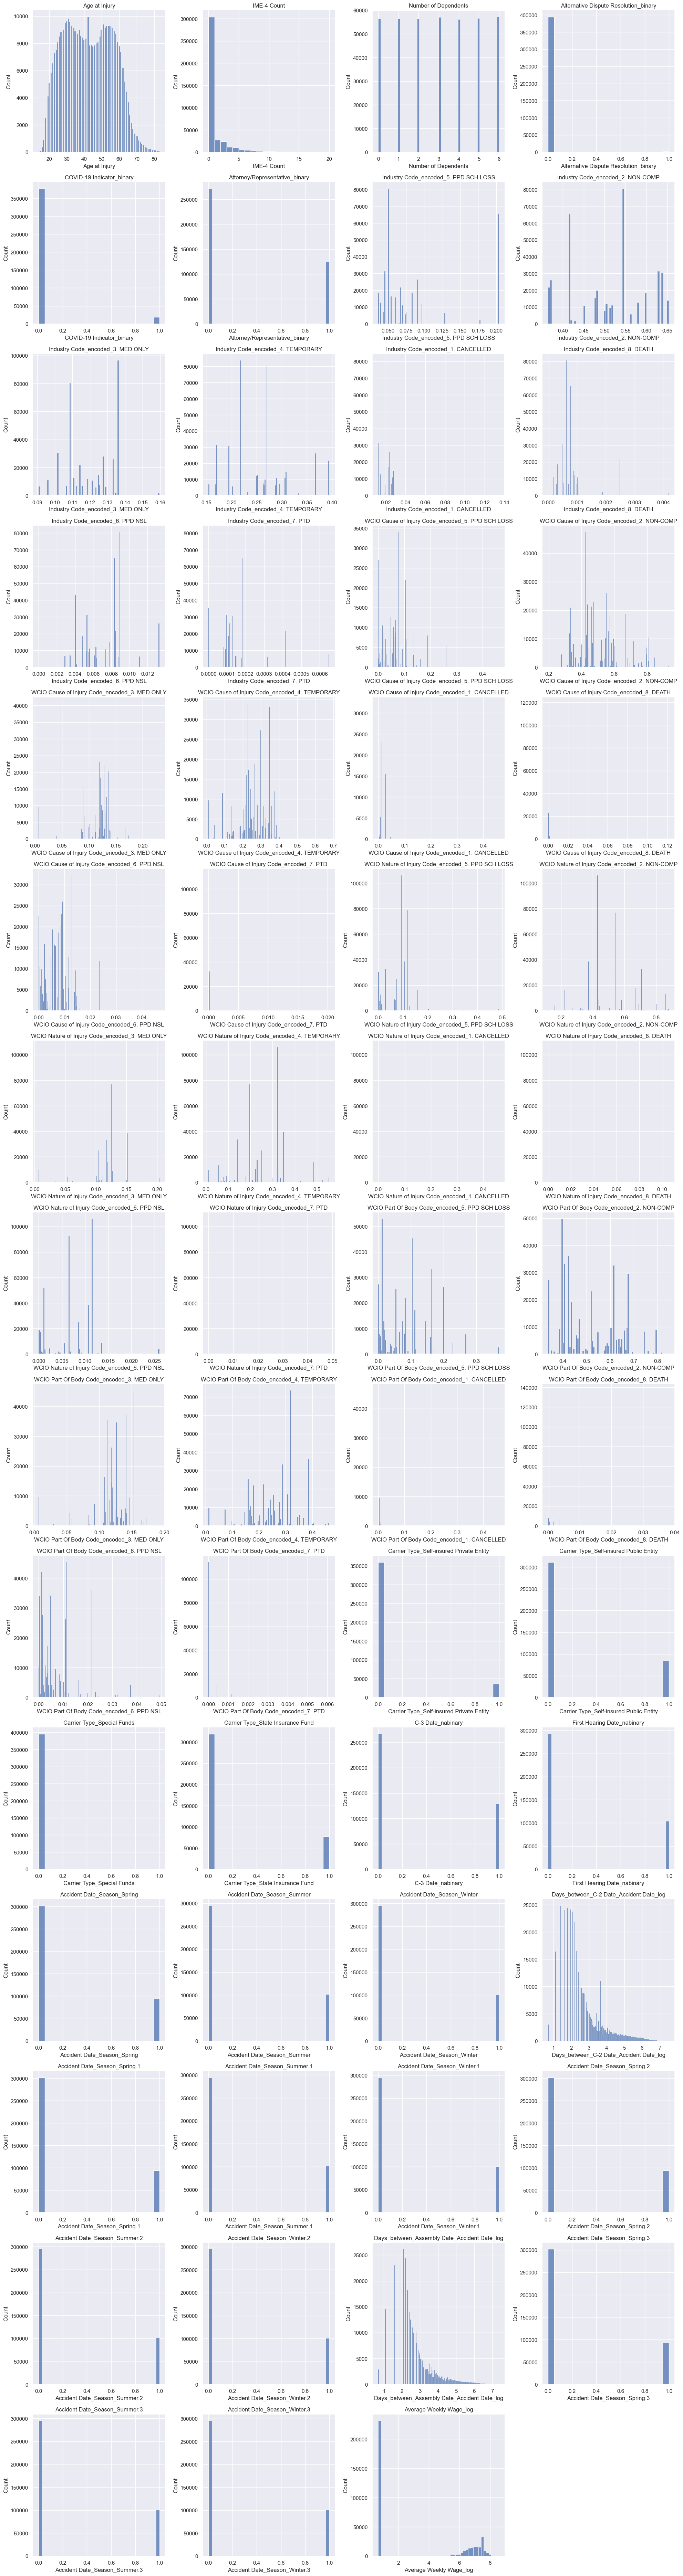

In [12]:
# plot me the distribution of all the columns
sns.set_theme()

num_cols = len(X_train.columns)
num_rows = (num_cols // 4) + 1

plt.figure(figsize=(20, num_rows * 5))
for i, col in enumerate(X_train.columns):
    plt.subplot(num_rows, 4, i+1)
    sns.histplot(X_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## 2. Data Preprocessing
Separate Features and Target

In [11]:
X_train.columns

Index(['Age at Injury', 'IME-4 Count', 'Number of Dependents',
       'Alternative Dispute Resolution_binary', 'COVID-19 Indicator_binary',
       'Attorney/Representative_binary',
       'Industry Code_encoded_5. PPD SCH LOSS',
       'Industry Code_encoded_2. NON-COMP',
       'Industry Code_encoded_3. MED ONLY',
       'Industry Code_encoded_4. TEMPORARY',
       'Industry Code_encoded_1. CANCELLED', 'Industry Code_encoded_8. DEATH',
       'Industry Code_encoded_6. PPD NSL', 'Industry Code_encoded_7. PTD',
       'WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS',
       'WCIO Cause of Injury Code_encoded_2. NON-COMP',
       'WCIO Cause of Injury Code_encoded_3. MED ONLY',
       'WCIO Cause of Injury Code_encoded_4. TEMPORARY',
       'WCIO Cause of Injury Code_encoded_1. CANCELLED',
       'WCIO Cause of Injury Code_encoded_8. DEATH',
       'WCIO Cause of Injury Code_encoded_6. PPD NSL',
       'WCIO Cause of Injury Code_encoded_7. PTD',
       'WCIO Nature of Injury Code_enco

In [12]:
# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

categorical_cols = ['COVID-19 Indicator_binary', 'Attorney/Representative_binary','Carrier Type_Self-insured Private Entity',
       'Carrier Type_Self-insured Public Entity', 'Carrier Type_Special Funds',
       'Carrier Type_State Insurance Fund', 'C-3 Date_nabinary', 'First Hearing Date_nabinary', 'Accident Date_Season_Spring',
       'Accident Date_Season_Summer', 'Accident Date_Season_Winter' ]


numerical_cols = X_train.drop(columns=categorical_cols).columns.tolist()

In [13]:
numerical_cols

['Age at Injury',
 'IME-4 Count',
 'Number of Dependents',
 'Alternative Dispute Resolution_binary',
 'Industry Code_encoded_5. PPD SCH LOSS',
 'Industry Code_encoded_2. NON-COMP',
 'Industry Code_encoded_3. MED ONLY',
 'Industry Code_encoded_4. TEMPORARY',
 'Industry Code_encoded_1. CANCELLED',
 'Industry Code_encoded_8. DEATH',
 'Industry Code_encoded_6. PPD NSL',
 'Industry Code_encoded_7. PTD',
 'WCIO Cause of Injury Code_encoded_5. PPD SCH LOSS',
 'WCIO Cause of Injury Code_encoded_2. NON-COMP',
 'WCIO Cause of Injury Code_encoded_3. MED ONLY',
 'WCIO Cause of Injury Code_encoded_4. TEMPORARY',
 'WCIO Cause of Injury Code_encoded_1. CANCELLED',
 'WCIO Cause of Injury Code_encoded_8. DEATH',
 'WCIO Cause of Injury Code_encoded_6. PPD NSL',
 'WCIO Cause of Injury Code_encoded_7. PTD',
 'WCIO Nature of Injury Code_encoded_5. PPD SCH LOSS',
 'WCIO Nature of Injury Code_encoded_2. NON-COMP',
 'WCIO Nature of Injury Code_encoded_3. MED ONLY',
 'WCIO Nature of Injury Code_encoded_4. TEMP

In [14]:
# Compute correlation matrix
corr_matrix = X_train.corr().abs()

# Upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Show the correlation matrix as a plot (optional)
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix")
# plt.show()

# Find features with correlation greater than 0.9
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.8)]

# Extract feature pairs with correlation values
high_corr_pairs = [(col1, col2, upper.loc[col1, col2]) 
                   for col1 in upper.columns 
                   for col2 in upper.index 
                   if upper.loc[col1, col2] > 0.8]

# Print the pairs of highly correlated features and their correlation values
print("Highly correlated feature pairs:")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2}: Correlation = {corr_value:.2f}")

print(f"\nDrop features due to high correlation: {high_corr_features}")


Highly correlated feature pairs:
WCIO Cause of Injury Code_encoded_2. NON-COMP and WCIO Cause of Injury Code_encoded_4. TEMPORARY: Correlation = 0.80
WCIO Cause of Injury Code_encoded_1. CANCELLED and WCIO Nature of Injury Code_encoded_1. CANCELLED: Correlation = 0.99
WCIO Cause of Injury Code_encoded_1. CANCELLED and WCIO Part Of Body Code_encoded_1. CANCELLED: Correlation = 0.99
WCIO Nature of Injury Code_encoded_2. NON-COMP and WCIO Nature of Injury Code_encoded_4. TEMPORARY: Correlation = 0.86
WCIO Nature of Injury Code_encoded_1. CANCELLED and WCIO Part Of Body Code_encoded_1. CANCELLED: Correlation = 0.99
Days_between_Assembly Date_Accident Date_log and Days_between_C-2 Date_Accident Date_log: Correlation = 0.92

Drop features due to high correlation: ['WCIO Cause of Injury Code_encoded_4. TEMPORARY', 'WCIO Nature of Injury Code_encoded_4. TEMPORARY', 'WCIO Nature of Injury Code_encoded_1. CANCELLED', 'WCIO Part Of Body Code_encoded_1. CANCELLED', 'Days_between_C-2 Date_Accident 

In [15]:
# X_corr.info()

# # turn the following columns into floats
# #  3   Alternative Dispute Resolution_binary               396097 non-null  int64  
# #  4   COVID-19 Indicator_binary                           396097 non-null  int64  
# #  5   Attorney/Representative_binary                      396097 non-null  int64  a
# #  'Carrier Type_Self-insured Private Entity',
# #  'Carrier Type_Self-insured Public Entity',
# #  'Carrier Type_Special Funds',
# #  'Carrier Type_State Insurance Fund'

# #  42  Accident Date_Season_Spring                         396097 non-null  float64
# #  43  Accident Date_Season_Summer                         396097 non-null  float64
# #  44  Accident Date_Season_Winter                         396097 non-null  float64



# X_corr['Alternative Dispute Resolution_binary'] = X_corr['Alternative Dispute Resolution_binary'].astype(bool)
# X_corr['COVID-19 Indicator_binary'] = X_corr['COVID-19 Indicator_binary'].astype(bool)
# X_corr['Attorney/Representative_binary'] = X_corr['Attorney/Representative_binary'].astype(bool)
# X_corr['Carrier Type_Self-insured Private Entity'] = X_corr['Carrier Type_Self-insured Private Entity'].astype(bool)
# X_corr['Carrier Type_Self-insured Public Entity'] = X_corr['Carrier Type_Self-insured Public Entity'].astype(bool)
# X_corr['Carrier Type_Special Funds'] = X_corr['Carrier Type_Special Funds'].astype(bool)
# X_corr['Carrier Type_State Insurance Fund'] = X_corr['Carrier Type_State Insurance Fund'].astype(bool)
# X_corr['Accident Date_Season_Spring'] = X_corr['Accident Date_Season_Spring'].astype(bool)
# X_corr['Accident Date_Season_Summer'] = X_corr['Accident Date_Season_Summer'].astype(bool)
# X_corr['Accident Date_Season_Winter'] = X_corr['Accident Date_Season_Winter'].astype(bool)

In [16]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
import pandas as pd

# Ensure X_corr_filtered does not contain negative values
# Chi-squared test requires non-negative values
X_corr_filtered = X_train[categorical_cols]
if (X_corr_filtered < 0).any().any():
    raise ValueError("X_corr_filtered contains negative values. Ensure all features are non-negative.")

# show how man NaN values are in the columns
if (X_corr_filtered.isna().sum().sum() > 0):
    raise ValueError("X_corr_filtered contains NaN values. Ensure all features are non-negative.")



# imputer = SimpleImputer(strategy="most_frequent")  # or use a different strategy if needed
# X_corr_filtered = pd.DataFrame(imputer.fit_transform(X_corr_filtered), columns=X_corr_filtered.columns)

# Fit the chi-squared selector
chi2_selector = SelectKBest(chi2, k=10)
try:
    chi2_selector.fit(X_corr_filtered, y_train)
    chi2_features = X_corr_filtered.columns[chi2_selector.get_support(indices=True)].tolist()
    X_chi2 = X_corr_filtered[chi2_features]
    print(f"Selected features from chi-squared test: {chi2_features}")
except ValueError as e:
    print("Error during chi-squared test:", e)
    raise

# columns to drop 
chi_sq_drop_cols = list(set(categorical_cols) - set(X_chi2.columns))
print(f'columns that we drop due to chi-squared test: {chi_sq_drop_cols}')

Selected features from chi-squared test: ['COVID-19 Indicator_binary', 'Attorney/Representative_binary', 'Carrier Type_Self-insured Private Entity', 'Carrier Type_Self-insured Public Entity', 'Carrier Type_Special Funds', 'Carrier Type_State Insurance Fund', 'C-3 Date_nabinary', 'First Hearing Date_nabinary', 'Accident Date_Season_Spring', 'Accident Date_Season_Winter']
columns that we drop due to chi-squared test: ['Accident Date_Season_Summer']


### Drop features
* drop the features that we got out of the caluclations in the correlation and chi-squared section


In [17]:
col_to_drop = high_corr_features + chi_sq_drop_cols

# drop columns from X_train, X_val, X_test
X_train_filter = X_train.drop(columns= col_to_drop)
X_val_filter = X_val.drop(columns= col_to_drop)
X_test_filter= X_test.drop(columns= col_to_drop)

## Model training and feature selction 

In [18]:
def model_training(model, param_grid, model_name,X_train_input, y_train_input, X_val_input, y_val_input):
    """
    Train, tune, and evaluate the model.
    """
    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               scoring='f1_macro',
                               cv=5,
                               n_jobs=-1)
    grid_search.fit(X_train_input, y_train_input)
    
    # Best estimator
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_val_input)
    
    # Evaluation metrics
    f1 = f1_score(y_val_input, y_pred, average='macro')
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"F1 Score: {f1:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_val_input, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val_input, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # ROC Curve
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_val_input)
        n_classes = len(np.unique(y_train_input))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_val_input == i, y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Plot ROC curves for each class
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curves - {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()
    else:
        print(f"ROC Curve not available for {model_name}.")
    
    return best_model

### Model Run

In [24]:
# run mode with a sample of 10000 rows first 
X_train_sample = X_train.sample(n=50000, random_state=42)
# get index from X_train_sample and select those rows from y_train
y_train_sample = y_train.loc[X_train_sample.index]

X_val_sample = X_val.sample(n=50000, random_state=42)
# get index from X_train_sample and select those rows from y_train
y_val_sample = y_val.loc[X_val_sample.index]

Model: Decision Tree
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 5}
F1 Score: 0.4044

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52      3741
           1       0.85      0.96      0.90     87319
           2       0.35      0.10      0.15     20672
           3       0.71      0.82      0.76     44551
           4       0.63      0.53      0.58     14484
           5       0.09      0.02      0.03      1263
           6       0.00      0.00      0.00        29
           7       0.35      0.24      0.29       141

    accuracy                           0.77    172200
   macro avg       0.44      0.40      0.40    172200
weighted avg       0.72      0.77      0.73    172200



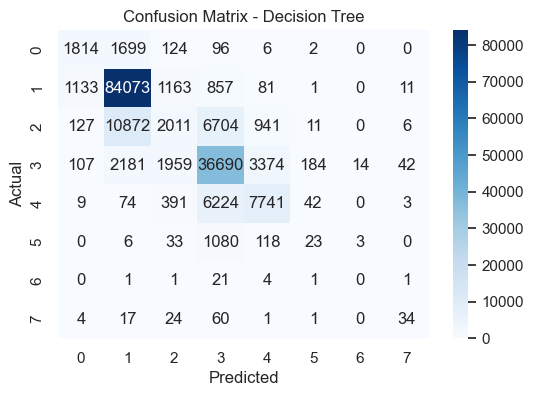

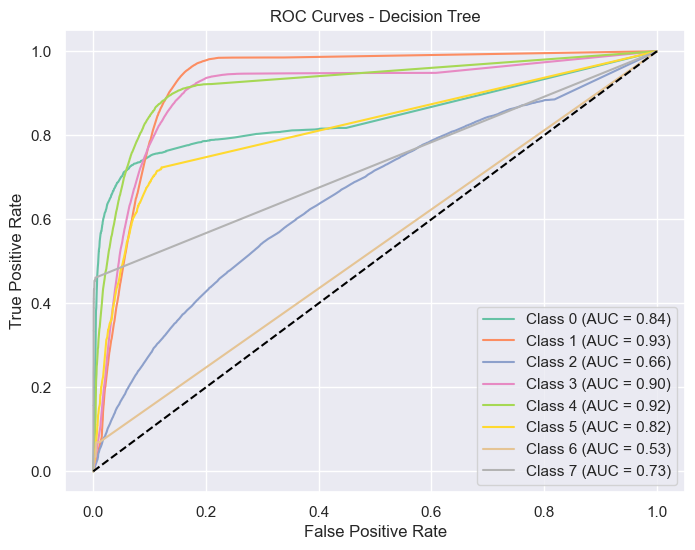

In [25]:
# Define model and parameters
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Train and evaluate
best_dt = model_training(
    dt_model, 
    dt_param_grid, 
    'Decision Tree', 
    X_train,
    y_train,
    X_val,
    y_val)

In [132]:
print(encoder_dict)

{4: '5. PPD SCH LOSS', 1: '2. NON-COMP', 2: '3. MED ONLY', 3: '4. TEMPORARY', 0: '1. CANCELLED', 7: '8. DEATH', 5: '6. PPD NSL', 6: '7. PTD'}


In [119]:
display(y_val_inverse)
display(y_train_inverse)

array(['2. NON-COMP', '2. NON-COMP', '3. MED ONLY', ..., '3. MED ONLY',
       '2. NON-COMP', '4. TEMPORARY'], dtype=object)

array(['5. PPD SCH LOSS', '2. NON-COMP', '5. PPD SCH LOSS', ...,
       '2. NON-COMP', '2. NON-COMP', '1. CANCELLED'], dtype=object)

Model: Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
F1 Score: 0.3546

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.45      0.52      3741
           1       0.84      0.95      0.89     87319
           2       0.36      0.06      0.10     20672
           3       0.68      0.87      0.77     44551
           4       0.67      0.46      0.55     14484
           5       0.29      0.00      0.00      1263
           6       0.00      0.00      0.00        29
           7       0.00      0.00      0.00       141

    accuracy                           0.77    172200
   macro avg       0.43      0.35      0.35    172200
weighted avg       0.72      0.77      0.72    172200



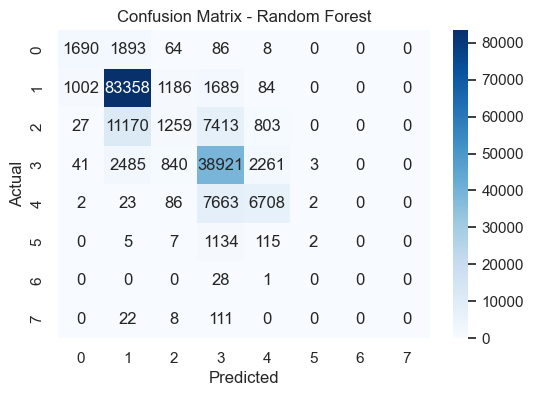

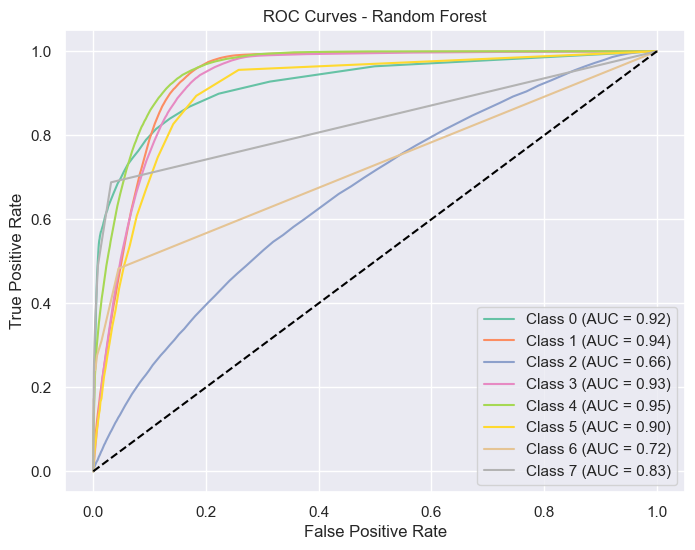

In [23]:
# Define model and parameters
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Train and evaluate
best_rf = model_training(rf_model,
                        rf_param_grid,
                        'Random Forest',
                        X_train_sample,
                        y_train_sample['Claim Injury Type'],    
                        X_val,
                        y_val['Claim Injury Type'])

In [ ]:
# Define model and parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# Train and evaluate
best_xgb = model_training(xgb_model,
                        xgb_param_grid,
                        'XGBoost',
                        X_train[rfe_features],
                        y_train,    
                        X_val[rfe_features],
                        y_val)